<a href="https://colab.research.google.com/github/mohammedradman1/DSE_Term_Project/blob/main/DSE_Term_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Obtaining Data from Git Repository

### Obtain the data from the project repository in Github

In [1]:
# obtaining the data from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# unzipping the file to cureent working directory
!unzip '/content/drive/MyDrive/DSE_Term_Project/TeePublic_review.zip' -d '/content'

Archive:  /content/drive/MyDrive/DSE_Term_Project/TeePublic_review.zip
  inflating: /content/TeePublic_review.csv  


### Import needed libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # importing matplot library for graph
import seaborn as sns  # importing searborns library
import nltk # importing Natural Language Toolkit library
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

### Read Data into pandas datafram

In [4]:
# Reading CSV file into pandas dataframe.
df = pd.read_csv("TeePublic_review.csv", encoding='latin-1') # reading the datafile
df.head()

,reviewer_id,store_location,latitude,longitude,date,month,year,title,review,review-label
0,0.0,US,37.090240,-95.712891,2023,6,2015 00:00:00,Great help with lost order,I had an order that was lost in transit. When ...,5
1,1.0,US,37.090240,-95.712891,2023,6,2024 00:00:00,I ordered the wrong size tee and hadï¿½ï¿½ï¿½,I ordered the wrong size tee and had difficult...,5
2,2.0,US,37.090240,-95.712891,2023,6,2017 00:00:00,These guys offer the best customerï¿½ï¿½ï¿½,These guys offer the best customer service in ...,5
3,3.0,US,37.090240,-95.712891,2023,6,2024 00:00:00,Good Stuff,Looked for an obscure phrase on a shirt. Teepu...,5
4,4.0,CA,56.130366,-106.346771,2023,6,2023 00:00:00,My order arrived in a good timelyï¿½ï¿½ï¿½,My order arrived in a good timely fashion & th...,4


# Exploratory Data Analysis

In [ ]:
# checking the shape of the data
print(df.shape)

(278100, 9)


In [ ]:
# viewing a sample of the data
df.sample(5)

,store_location,latitude,longitude,date,month,year,title,review,review-label
reviewer_id,,,,,,,,,
259652.0,US,37.09024,-95.712891,2019,2,2027 00:00:00,birthday party tshirt favor fornite,Great Shirt! !,4
124384.0,US,37.09024,-95.712891,2021,12,2021 00:00:00,Quality product,"Quick delivery, quality product.",5
89390.0,US,37.09024,-95.712891,2022,5,2027 00:00:00,They are perfect t-shirts! My son and daughter...,They are perfect t-shirts! My son,5
135303.0,US,37.09024,-95.712891,2021,11,2004 00:00:00,I ordered a female tee sized 2XL,I ordered a female tee sized 2XL.The shirt was...,1
213372.0,US,37.09024,-95.712891,2020,3,2027 00:00:00,Very nice I love it!,NaN,5


In [ ]:
# viewing information of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 278100 entries, 0.0 to nan
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   store_location  278100 non-null  object 
 1   latitude        278100 non-null  float64
 2   longitude       278100 non-null  float64
 3   date            278100 non-null  int64  
 4   month           278100 non-null  int64  
 5   year            278100 non-null  object 
 6   title           278091 non-null  object 
 7   review          247597 non-null  object 
 8   review-label    278100 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.2+ MB


In [ ]:
# view statistical analysis of all numerical columns
df.describe()

,latitude,longitude,date,month,review-label
count,278100.000000,278100.000000,278100.000000,278100.000000,278100.000000
mean,37.189516,-88.182471,2020.889518,7.195329,4.409730
std,10.217722,37.028084,1.390760,3.678214,1.178112
min,-40.900557,-172.104629,2018.000000,1.000000,1.000000
25%,37.090240,-95.712891,2020.000000,4.000000,4.000000
50%,37.090240,-95.712891,2021.000000,7.000000,5.000000
75%,37.090240,-95.712891,2022.000000,11.000000,5.000000
max,64.963051,174.885971,2023.000000,12.000000,5.000000


In [ ]:
# Display the statistical analysis of numerical columns for target class (mean, std, min, max, etc).
df['review-label'].describe()

count    278100.000000
mean          4.409730
std           1.178112
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: review-label, dtype: float64

Text(0.5, 0, 'Reviews Count')

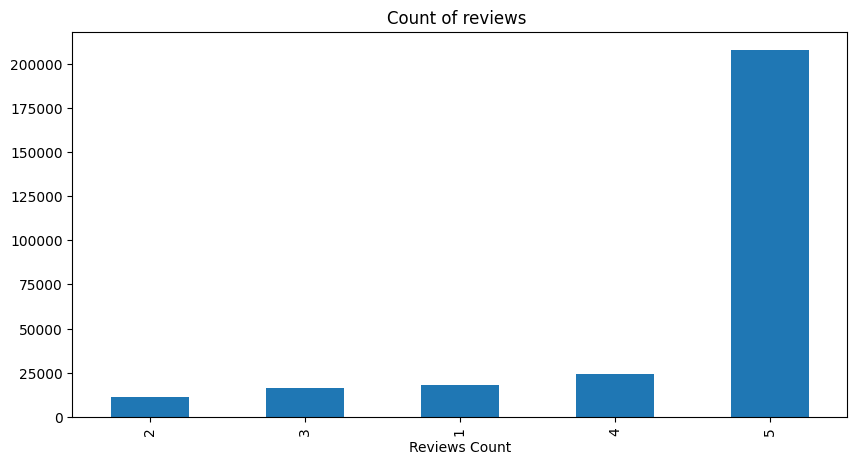

In [ ]:
# plotting the count of the unique values within the review-label
reviews = df['review-label']
ax = reviews.value_counts().sort_values()\
      .plot( title = 'Count of reviews ',
            figsize = (10,5),
             kind = 'bar')
ax.set_xlabel('Reviews stars')

In [ ]:
# checking for null values in columns
df.isnull().sum()

store_location        0
latitude              0
longitude             0
date                  0
month                 0
year                  0
title                 9
review            30503
review-label          0
dtype: int64

In [ ]:
df['review-label'].value_counts()

5    207574
4     24501
1     18133
3     16555
2     11337
Name: review-label, dtype: int64

In [ ]:
example = df['review'].values[2]
print(example)

These guys offer the best customer service in all of retail! Their products are off high quality and there's a fantastic selection of design and product options.


In [ ]:
tokens=nltk.wordpunct_tokenize(example)
tokens[ :10]

['These',
 'guys',
 'offer',
 'the',
 'best',
 'customer',
 'service',
 'in',
 'all',
 'of']

In [ ]:
tagged = nltk.pos_tag(tokens)
tagged[ :10]

[('These', 'DT'),
 ('guys', 'NNS'),
 ('offer', 'VBP'),
 ('the', 'DT'),
 ('best', 'JJS'),
 ('customer', 'NN'),
 ('service', 'NN'),
 ('in', 'IN'),
 ('all', 'DT'),
 ('of', 'IN')]

In [ ]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


(S
  These/DT
  guys/NNS
  offer/VBP
  the/DT
  best/JJS
  customer/NN
  service/NN
  in/IN
  all/DT
  of/IN
  retail/JJ
  !/.
  Their/PRP$
  products/NNS
  are/VBP
  off/RB
  high/JJ
  quality/NN
  and/CC
  there/EX
  '/''
  s/VBD
  a/DT
  fantastic/JJ
  selection/NN
  of/IN
  design/NN
  and/CC
  product/NN
  options/NNS
  ./.)


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
#sentiment analysis by vader
#1.stop words are removed
#2.each word is scored and combined to a total score

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
example

"These guys offer the best customer service in all of retail! Their products are off high quality and there's a fantastic selection of design and product options."

In [ ]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'compound': 0.8439}



---



---



---



---



# Data Cleaning

## Filling with the mode per each category

In this method we as we have the rating value for each null review, <br> we can fill the review with the mode value of the rate category.

In [5]:
df.isnull().sum()

reviewer_id           1
store_location        0
latitude              0
longitude             0
date                  0
month                 0
year                  0
title                 9
review            30503
review-label          0
dtype: int64

In [6]:
# finding the modes for each category
rate_cat_modes = df.groupby('review-label')['review'].apply(lambda x: x.mode()[0])
rate_cat_modes

review-label
1    First time customer with TeePublic...placed an...
2    Did not look like what was pictured. The graph...
3    As described, good delivery I would use them a...
4    4 stars: Great ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ dec...
5                                        Great service
Name: review, dtype: object

In [7]:
df[ df['review'].isnull() ].sample(4)

,reviewer_id,store_location,latitude,longitude,date,month,year,title,review,review-label
150232,150232.0,US,37.09024,-95.712891,2021,6,2025 00:00:00,Get better quality t shirts,NaN,3
82156,82156.0,US,37.09024,-95.712891,2022,6,2025 00:00:00,So soft and love the designs!!!,NaN,5
38556,38556.0,US,37.09024,-95.712891,2022,12,2019 00:00:00,Sizing runs very small,NaN,3
17173,17173.0,US,37.09024,-95.712891,2023,3,2023 00:00:00,Perfect fit and great graphics!,NaN,5


In [8]:
# define a function that fills each Nan review with the most common value
def fillna_rate(row):
   row['review'] = rate_cat_modes[row['review-label']]
   return row

In [9]:
df_filled_mode = df.apply(fillna_rate, axis=1)

In [10]:
df_filled_mode.isnull().sum()

reviewer_id       1
store_location    0
latitude          0
longitude         0
date              0
month             0
year              0
title             9
review            0
review-label      0
dtype: int64

## Filling values using KNN

### Related Columns Preprocessing

In [197]:
# find null values
df.isnull().sum()

reviewer_id           1
store_location        0
latitude              0
longitude             0
date                  0
month                 0
year                  0
title                 9
review            30503
review-label          0
dtype: int64

we fill the null values of the other column so we can use it in the analysis. <br>
We will fill them with the mode value since they are small.

*   Title has 9 null values
*   reviewer_id will not be filled as it is not used in the KNN as a feature





In [198]:
# the mode value of the title
data = df
title_mode = data['title'].mode()[0]


We drop the unnecessary columns from the data:

*   Reviewer id: as it is a system generated value.
*   year: a duplicate of the date and consists of misleading data



In [199]:
# droping the reviewer_id and year from data
# store it in data again so that the droped column data is stored back
data = data.drop(['reviewer_id','year'], axis = 1)
# verify the drop
data.shape

(278100, 8)

In [200]:
# the title null value rows
data[ data['title'].isnull() ]

,store_location,latitude,longitude,date,month,title,review,review-label
12301,US,37.090240,-95.712891,2023,4,NaN,- These Simpsons themed t-shirts are the best ...,5
17903,CA,56.130366,-106.346771,2023,3,NaN,"-Ease of ordering has changed for the better, ...",4
47972,CA,56.130366,-106.346771,2022,11,NaN,"- offering a variety of products, by artisans-...",5
101144,US,37.090240,-95.712891,2022,4,NaN,NaN,4
124040,US,37.090240,-95.712891,2021,12,NaN,- Need confirmation numbers on a more timely b...,2
126610,DE,51.165691,10.451526,2021,12,NaN,+++fast shipping+++nice t-shirts+++very good+++,5
198331,CA,56.130366,-106.346771,2020,7,NaN,NaN,4
232304,US,37.090240,-95.712891,2019,12,NaN,"+Delivery time was great , printing was good b...",4
265332,US,37.090240,-95.712891,2018,12,NaN,NaN,5


In [201]:
# we fill the values of
data['title'].fillna( df['title'].mode()[0] , inplace = True)

In [202]:
# verify that the title column value is not null anymores
data.isnull().sum()

store_location        0
latitude              0
longitude             0
date                  0
month                 0
title                 0
review            30503
review-label          0
dtype: int64

In [203]:
# learning the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278100 entries, 0 to 278099
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   store_location  278100 non-null  object 
 1   latitude        278100 non-null  float64
 2   longitude       278100 non-null  float64
 3   date            278100 non-null  int64  
 4   month           278100 non-null  int64  
 5   title           278100 non-null  object 
 6   review          247597 non-null  object 
 7   review-label    278100 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 17.0+ MB


we encode the store_location into numerical values.

In [204]:
# country encoding numbers
numerical_val = [x for x in range(1, 142)]
countries_name = data['store_location'].unique()

# replace the country with its label encoding.
data['store_location'].replace(countries_name, numerical_val, inplace = True)

data.head()

,store_location,latitude,longitude,date,month,title,review,review-label
0,1,37.090240,-95.712891,2023,6,Great help with lost order,I had an order that was lost in transit. When ...,5
1,1,37.090240,-95.712891,2023,6,I ordered the wrong size tee and hadï¿½ï¿½ï¿½,I ordered the wrong size tee and had difficult...,5
2,1,37.090240,-95.712891,2023,6,These guys offer the best customerï¿½ï¿½ï¿½,These guys offer the best customer service in ...,5
3,1,37.090240,-95.712891,2023,6,Good Stuff,Looked for an obscure phrase on a shirt. Teepu...,5
4,2,56.130366,-106.346771,2023,6,My order arrived in a good timelyï¿½ï¿½ï¿½,My order arrived in a good timely fashion & th...,4


In [205]:
# we store the data with null values in a different dataframe
data_na_review = data[ data['review'].isna()]
data_na_review.shape

(30503, 8)

In [206]:
data.shape

(278100, 8)

In [207]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278100 entries, 0 to 278099
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   store_location  278100 non-null  int64  
 1   latitude        278100 non-null  float64
 2   longitude       278100 non-null  float64
 3   date            278100 non-null  int64  
 4   month           278100 non-null  int64  
 5   title           278100 non-null  object 
 6   review          247597 non-null  object 
 7   review-label    278100 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 17.0+ MB


### Text Preprocessing

#### Importing Libraries and Cleaning data

We will import libraries for steming and stop words



In [208]:
import re  # For regular expressions
import numpy as np
# import the natural language processing library
import nltk
nltk.download('punkt') # download the punkt words tokens
from nltk.tokenize import word_tokenize  #$ importing the word tokenizer
# nltk.download('wordnet')
# from nltk.stem import WordNetLemmatizer  #$ importing the word lemmatizer
nltk.download('stopwords')
from nltk.corpus import stopwords  # For stop words
from nltk.stem import PorterStemmer  # For stemming

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [209]:
# function to clean the text columns
def clean_text(text):
    text = re.sub('<[^>]*>', '', text) #removing html tags
    text = re.sub('[^A-Za-z0-9\s]', '', text) # Remove punctuation and special characters
    text = re.sub('\s+', ' ', text) # Remove extra spaces
    text = text.lower()
    return text

In [210]:
# we need cleaning on title and review
data['title'] = data['title'].apply(clean_text)

#### Tokenization & Normalization

In [211]:
#converting the text to tokens and adding them into a new columns for the title
data['title_tokens'] = df['title'].apply(lambda text: word_tokenize(text) if isinstance(text, str) else [])

Word stemming and stop words removal, we return the words to their root and remove the stop words.

In [212]:
# we import the stopwords of English
stop_words = set( stopwords.words('english'))

In [213]:
# Normalizing and removal of stop words
stemmer = PorterStemmer()  # creating a stemmer

# stem and removal of stop words
def stemFun(tokens):
  stem_list = []
  for word in tokens:
    if word in stop_words:  # check if word is a stop word pass over it.
      pass
    else: # if word is not a stopword, stem it and store it in list.
      stem_list.append( stemmer.stem(word) )

  return  stem_list

data['title_tokens'] = data['title_tokens'].apply(stemFun)
# data['review_tokens'] = data['review_tokens'].apply(stemFun)

In [214]:
data.head()

,store_location,latitude,longitude,date,month,title,review,review-label,title_tokens
0,1,37.090240,-95.712891,2023,6,great help with lost order,I had an order that was lost in transit. When ...,5,"[great, help, lost, order]"
1,1,37.090240,-95.712891,2023,6,i ordered the wrong size tee and had,I ordered the wrong size tee and had difficult...,5,"[i, order, wrong, size, tee, hadï¿½ï¿½ï¿½]"
2,1,37.090240,-95.712891,2023,6,these guys offer the best customer,These guys offer the best customer service in ...,5,"[these, guy, offer, best, customerï¿½ï¿½ï¿½]"
3,1,37.090240,-95.712891,2023,6,good stuff,Looked for an obscure phrase on a shirt. Teepu...,5,"[good, stuff]"
4,2,56.130366,-106.346771,2023,6,my order arrived in a good timely,My order arrived in a good timely fashion & th...,4,"[my, order, arriv, good, timelyï¿½ï¿½ï¿½]"


In [215]:
# importing necessary libraries
from gensim.models import Word2Vec

# getting the processed titles and reviews
processed_text_title = data[ 'title_tokens' ]

# Train Word2Vec model on the processed reviews
w2v_title_model = Word2Vec(processed_text_title.values.tolist(), min_count=1, window=5, vector_size=100)

In [216]:
# Function to create a document embedding by averaging word embeddings
def create_doc_embedding(doc):
    doc_embedding = 0
    words_count = 0
    for word in doc:
        if word in w2v_title_model.wv:
            doc_embedding += w2v_title_model.wv[word]
            words_count += 1
    if words_count != 0:
        doc_embedding = doc_embedding / words_count
    return doc_embedding

# Create document embeddings
def embed_doc (processed_text):
  doc_embeddings = []
  for text in processed_text.values:
      doc_embedding = create_doc_embedding(text)  # Using the previously defined function
      doc_embeddings.append(doc_embedding)

  return doc_embeddings

title_embeddings = embed_doc(processed_text_title)
# review_embeddings = embed_doc(processed_text_review, model_review )

In [217]:
# creating a dataframe with 100 columns
title_temp_df = pd.DataFrame([[ 0 for x in range(0,100)] for z in range(0,1)  ],
                       columns = ["title_embed_"+ str(x) for x in range(1,101)] )

# temparary dataframe to fill for missing values below
temp_df1 = pd.DataFrame([[ 0 for x in range(0,100)] for z in range(0,1)  ],
                       columns = ["title_embed_"+ str(x) for x in range(1,101)] )

In [218]:
title_temp_df.head()

,title_embed_1,title_embed_2,title_embed_3,title_embed_4,title_embed_5,title_embed_6,title_embed_7,title_embed_8,title_embed_9,title_embed_10,...,title_embed_91,title_embed_92,title_embed_93,title_embed_94,title_embed_95,title_embed_96,title_embed_97,title_embed_98,title_embed_99,title_embed_100
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [219]:
n= 1
for i in range( len(title_embeddings)):
  title_embed_list = []

  if np.shape(title_embeddings[i]) == (100,):
   title_embed =  np.reshape( title_embeddings[i], (-1,100) ) # convert the shape to (1,100)

   title_embed_list =[[  x for x in title_embed [0] ]]  # convert to 2D list 1 row * 100 column
   embeding_df_temp = pd.DataFrame( title_embed_list ,
                          columns = title_temp_df.columns)
  else:
    embeding_df_temp = temp_df1

  title_temp_df = pd.concat([title_temp_df, embeding_df_temp]) # Add to temporary dataframe

  n +=1
  if n>100:
    break


In [220]:
# check the data
print(f"shape of title embedding dataframe: {title_temp_df.shape}")
# delete first line that was added only for temperay use
title_temp_df = title_temp_df.iloc[1:, :]
print(f"shape of title embedding dataframe after removal of 1st row: {title_temp_df.shape}")

shape of title embedding dataframe: (101, 100)
shape of title embedding dataframe after removal of 1st row: (100, 100)


### Adding Vectorized Text to data

In [174]:
data.shape

(298, 115)

In [169]:
title_temp_df;
title_temp_df.shape

(298, 100)

In [241]:
data.shape

(278199, 109)

In [240]:
# adding the embedding back to the data
data = data.merge(title_temp_df, how='left', right_index = True, left_index = True)

In [242]:
# viewing the addition of the new data columns
data.head()

,store_location,latitude,longitude,date,month,title,review,review-label,title_tokens,title_embed_1,...,title_embed_91,title_embed_92,title_embed_93,title_embed_94,title_embed_95,title_embed_96,title_embed_97,title_embed_98,title_embed_99,title_embed_100
0,1,37.09024,-95.712891,2023,6,great help with lost order,I had an order that was lost in transit. When ...,5,"[great, help, lost, order]",0.075480,...,0.475254,0.300984,0.080060,0.048252,0.101214,0.316030,0.559396,-0.283956,0.213931,-0.180025
0,1,37.09024,-95.712891,2023,6,great help with lost order,I had an order that was lost in transit. When ...,5,"[great, help, lost, order]",0.342648,...,0.097567,0.746911,-0.634666,0.206056,0.641930,0.258499,0.879915,-0.382311,0.619543,-0.508522
0,1,37.09024,-95.712891,2023,6,great help with lost order,I had an order that was lost in transit. When ...,5,"[great, help, lost, order]",-0.256659,...,0.255424,0.403362,0.528320,0.383813,1.089671,0.209052,0.154214,-0.166130,-0.150419,-0.358265
0,1,37.09024,-95.712891,2023,6,great help with lost order,I had an order that was lost in transit. When ...,5,"[great, help, lost, order]",-0.549281,...,0.582614,-0.280800,0.459700,-0.027388,0.722555,-0.378836,0.297686,-0.645893,0.565258,-0.428243
0,1,37.09024,-95.712891,2023,6,great help with lost order,I had an order that was lost in transit. When ...,5,"[great, help, lost, order]",-0.051463,...,0.814346,-0.222247,-0.266608,-0.278300,0.127076,0.197275,0.091661,-0.142303,0.226433,-0.249848


### Numerical Preprocessing

In [243]:
# we perform scaling for the numerical columns and the target class
from sklearn.preprocessing import StandardScaler  # import standard scalar

# Extract numerical columns
numerical_cols = ["store_location", "latitude", "longitude", "date", "month", "review-label"]
numerical_data = data[numerical_cols]

# Standardize numerical data which is often recommended for KNN
scaler = StandardScaler()
numerical_data_scaled = pd.DataFrame(scaler.fit_transform(numerical_data),
                                      columns = numerical_data.columns)

In [244]:
# adding scaled values to the data
data = data.join(numerical_data_scaled, rsuffix='_scaled');  # using semicolon to prevent printing result
data.head(5)

,store_location,latitude,longitude,date,month,title,review,review-label,title_tokens,title_embed_1,...,title_embed_97,title_embed_98,title_embed_99,title_embed_100,store_location_scaled,latitude_scaled,longitude_scaled,date_scaled,month_scaled,review-label_scaled
0,1,37.09024,-95.712891,2023,6,great help with lost order,I had an order that was lost in transit. When ...,5,"[great, help, lost, order]",0.075480,...,0.559396,-0.283956,0.213931,-0.180025,-0.135861,-0.009714,-0.203333,1.516614,-0.324912,0.50092
0,1,37.09024,-95.712891,2023,6,great help with lost order,I had an order that was lost in transit. When ...,5,"[great, help, lost, order]",0.342648,...,0.879915,-0.382311,0.619543,-0.508522,-0.135861,-0.009714,-0.203333,1.516614,-0.324912,0.50092
0,1,37.09024,-95.712891,2023,6,great help with lost order,I had an order that was lost in transit. When ...,5,"[great, help, lost, order]",-0.256659,...,0.154214,-0.166130,-0.150419,-0.358265,-0.135861,-0.009714,-0.203333,1.516614,-0.324912,0.50092
0,1,37.09024,-95.712891,2023,6,great help with lost order,I had an order that was lost in transit. When ...,5,"[great, help, lost, order]",-0.549281,...,0.297686,-0.645893,0.565258,-0.428243,-0.135861,-0.009714,-0.203333,1.516614,-0.324912,0.50092
0,1,37.09024,-95.712891,2023,6,great help with lost order,I had an order that was lost in transit. When ...,5,"[great, help, lost, order]",-0.051463,...,0.091661,-0.142303,0.226433,-0.249848,-0.135861,-0.009714,-0.203333,1.516614,-0.324912,0.50092


### Splitting the data for KNN

The columns that will be used for analysis are:

*  `["title_embed_"+ str(x) for x in range(1,101)]`
*   Plus numerical scaled columns



In [245]:
# name of features for the embedded title
features_name = ["title_embed_"+ str(x) for x in range(1,101)]
for index, name in enumerate(numerical_data_scaled.columns):
  # skip the last index name which is the target variable
  if index != len(numerical_data_scaled.columns)-1:
    features_name.append(name + "_scaled") # add the name of the scaled feature.
  else:  # assigning the name for target variable
    target_name = name + "_scaled"


In [246]:
data

,store_location,latitude,longitude,date,month,title,review,review-label,title_tokens,title_embed_1,...,title_embed_97,title_embed_98,title_embed_99,title_embed_100,store_location_scaled,latitude_scaled,longitude_scaled,date_scaled,month_scaled,review-label_scaled
0,1,37.09024,-95.712891,2023,6,great help with lost order,I had an order that was lost in transit. When ...,5,"[great, help, lost, order]",0.075480,...,0.559396,-0.283956,0.213931,-0.180025,-0.135861,-0.009714,-0.203333,1.516614,-0.324912,0.50092
0,1,37.09024,-95.712891,2023,6,great help with lost order,I had an order that was lost in transit. When ...,5,"[great, help, lost, order]",0.342648,...,0.879915,-0.382311,0.619543,-0.508522,-0.135861,-0.009714,-0.203333,1.516614,-0.324912,0.50092
0,1,37.09024,-95.712891,2023,6,great help with lost order,I had an order that was lost in transit. When ...,5,"[great, help, lost, order]",-0.256659,...,0.154214,-0.166130,-0.150419,-0.358265,-0.135861,-0.009714,-0.203333,1.516614,-0.324912,0.50092
0,1,37.09024,-95.712891,2023,6,great help with lost order,I had an order that was lost in transit. When ...,5,"[great, help, lost, order]",-0.549281,...,0.297686,-0.645893,0.565258,-0.428243,-0.135861,-0.009714,-0.203333,1.516614,-0.324912,0.50092
0,1,37.09024,-95.712891,2023,6,great help with lost order,I had an order that was lost in transit. When ...,5,"[great, help, lost, order]",-0.051463,...,0.091661,-0.142303,0.226433,-0.249848,-0.135861,-0.009714,-0.203333,1.516614,-0.324912,0.50092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278095,1,37.09024,-95.712891,2018,4,highly recommend,"Delivery is quick, arrives when promised. Shir...",5,"[highli, recommend, !]",NaN,...,NaN,NaN,NaN,NaN,0.283890,1.722634,2.206620,-2.077717,-0.868742,0.50092
278096,47,45.10000,15.200000,2018,4,great quality,"Great quality, fast delivery, would recommend!",5,"[great, qualiti]",NaN,...,NaN,NaN,NaN,NaN,-0.135861,-0.009714,-0.203333,-2.077717,-0.868742,0.50092
278097,1,37.09024,-95.712891,2018,4,dudes rock,Dudes rock. Seriously.,5,"[dude, rock, .]",NaN,...,NaN,NaN,NaN,NaN,0.074014,1.854062,-0.490567,-2.077717,-0.868742,0.50092
278098,1,37.09024,-95.712891,2018,4,shipping was fast the tshirt was just,Shipping was fast the T-shirt was just right g...,5,"[ship, fast, t-shirt, justï¿½ï¿½ï¿½]",NaN,...,NaN,NaN,NaN,NaN,-0.135861,-0.009714,-0.203333,-2.077717,-0.868742,0.50092


In [247]:
# obtain the features + the target variable
X, Y = data[features_name], data[target_name]

In [250]:
# splitting the data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

In [ ]:
# Train model

In [ ]:
# Test model

In [161]:
# Choose a target review
target_review_index = 10  # Replace with the desired index
target_combined_data = combined_data[target_review_index]

# Find the closest neighbors
# distances, indices = knn.kneighbors([target_combined_data])

# Print the closest reviews
for i in range(len(indices[0])):
    neighbor_index = indices[0][i]
    print(f"Closest Review {i+1}:\n{data.iloc[neighbor_index]}")

NameError: name 'knn' is not defined